In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

In [2]:
df =pd.read_csv('C:\\Users\\alexr\\Desktop\\   \\Work\\Data Science\\In Use\\Ecommerce Clients\\Book1.csv',sep=';')

In [3]:
df.head(10)

,Email,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,32.021595,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,31.936549,11.814128,37.145168,3.202806,427.199385


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Avg. Session Length   500 non-null    float64
 2   Time on App           500 non-null    float64
 3   Time on Website       500 non-null    float64
 4   Length of Membership  500 non-null    float64
 5   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


In [9]:
df.describe().T\
        .style.bar(subset=['mean'], color=px.colors.qualitative.G10[5])\
        .background_gradient(subset=['std'], cmap='Blues')\
        .background_gradient(subset=['75%'], cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.000000,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.000000,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.000000,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.000000,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.000000,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


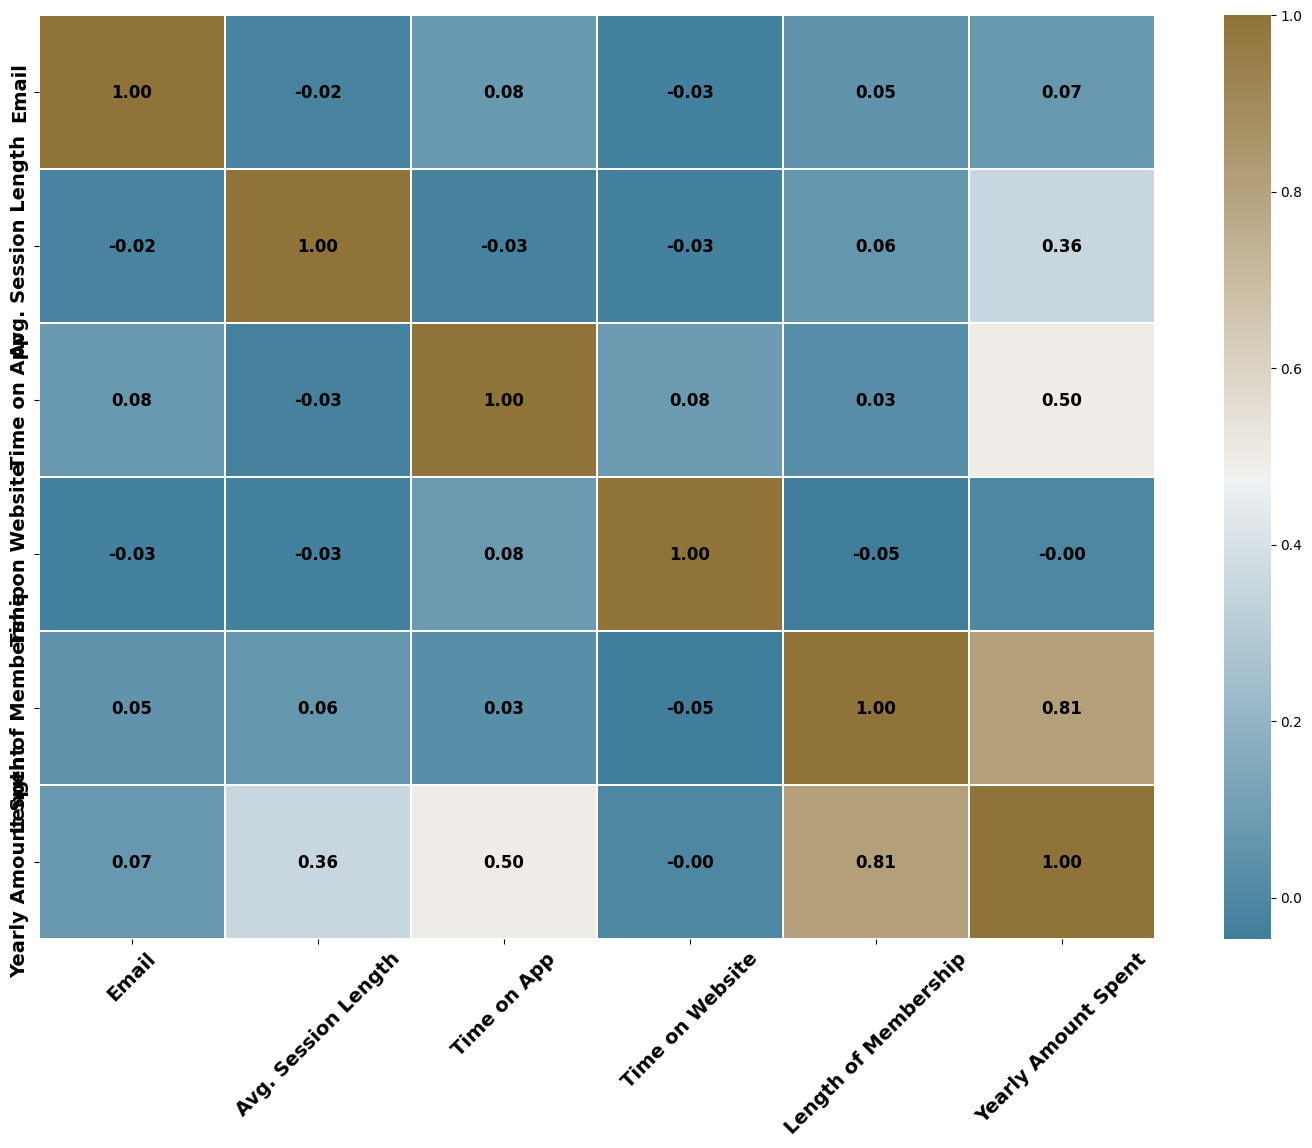

In [14]:
#Heatmap for correlation

# Initialize LabelEncoder object
label_encode = LabelEncoder()

# Create a copy of the DataFrame
df2 = df.copy()

# Iterate over columns in DataFrame
for i in df2.columns:
    # If column type is 'object', encode it using LabelEncoder
    if df2[i].dtype == 'object':
        df2[i] = LabelEncoder().fit_transform(df2[i])

# Plot correlation heatmap of modified DataFrame
plt.figure(figsize=(18, 12), facecolor='none')
sns.heatmap(
    df2.corr(),
    cmap=sns.diverging_palette(230, 60, as_cmap=True),
    annot=True,
    linewidths=0.2,
    annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'},
    fmt='.2f',
)
plt.xticks(fontsize=14, weight='bold', rotation=45)
plt.yticks(fontsize=14, weight='bold')
plt.show()

In [17]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [18]:
X.head()
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [21]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [24]:
# the coefficients
lm.coef_

array([25.72425621, 38.59713548,  0.45914786, 61.67473243])

In [25]:
# r squared
lm.score(X, y)

0.9842821675283161

In [26]:
# The coefficients in a dataframe
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


In [29]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
model_fit = model.fit()
print(model_fit.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     5825.
Date:                 Tue, 06 Aug 2024   Prob (F-statistic):          3.46e-315
Time:                         18:36:01   Log-Likelihood:                -1296.2
No. Observations:                  350   AIC:                             2602.
Df Residuals:                      345   BIC:                             2622.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

In [30]:
predictions = lm.predict(X_test)

In [38]:
# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(y_test, predictions)
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions')

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given